#Step 6
Validate your estimated parameters using QQ biplots.

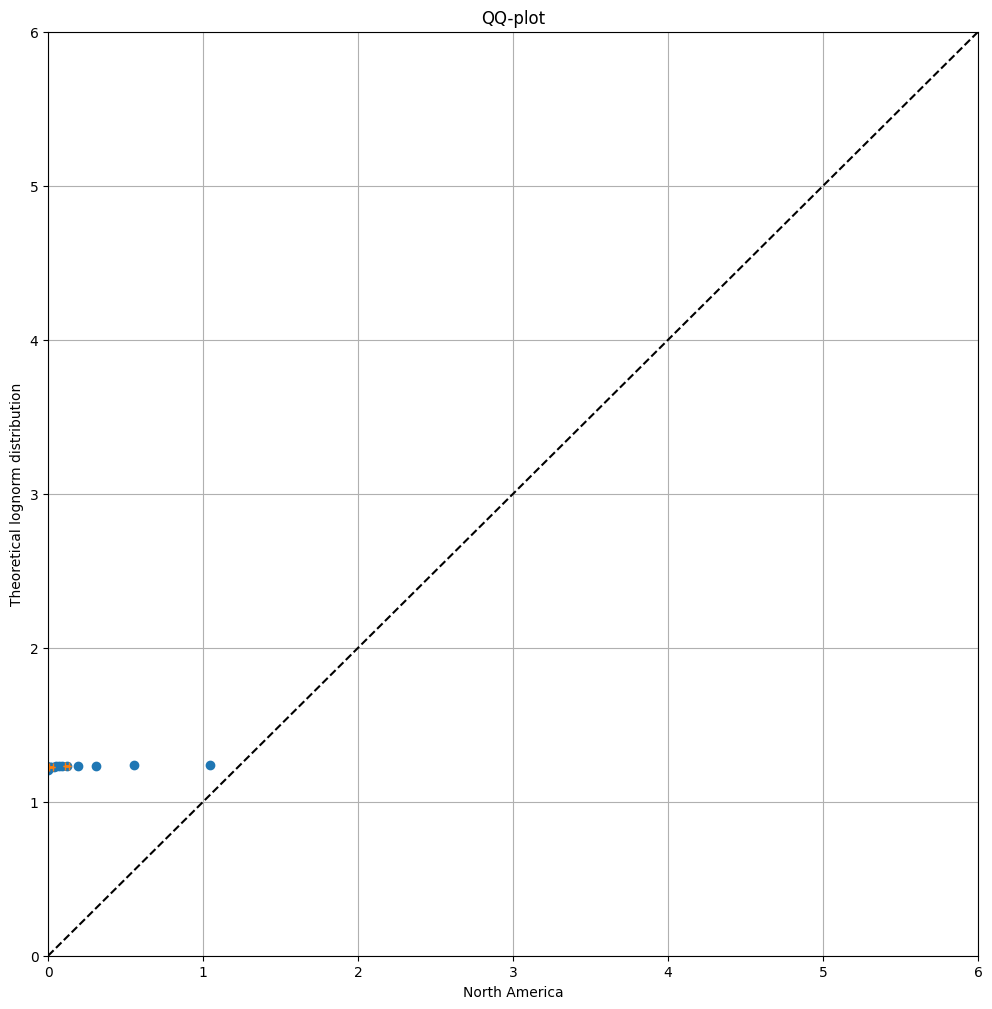

In [12]:
from numpy import sqrt
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import gamma

res = pd.read_csv('data/PS4_GamesSales.csv', header=0, encoding='unicode_escape')
res.fillna(value='N\A', inplace=True)

# Calculating confidence intervals for 25%, 50% and 75% quantiles
def conf_intervals(data, qn):
    # 95% quantile of Gaussian distribution
    norm_q95 = scipy.stats.norm.ppf(0.95)
    kernel = scipy.stats.gaussian_kde(data)

    p25 = len(data[data < qn[5]]) / len(data)
    sigma25 = \
        (sqrt((p25 * (1 - p25)) / len(data))) / kernel(qn[5])
    p50 = len(data[data < qn[10]]) / len(data)
    sigma50 = \
        (sqrt((p50 * (1 - p50)) / len(data))) / kernel(qn[10])
    p75 = len(data[data < qn[15]]) / len(data)
    sigma75 = \
        (sqrt((p75 * (1 - p75)) / len(data))) / kernel(qn[15])

    conf_q25 = norm_q95 * sigma25
    conf_q50 = norm_q95 * sigma50
    conf_q75 = norm_q95 * sigma75

    return [conf_q25, conf_q50, conf_q75]

# Расчет квантилей
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(res['North America'], percs)
params = scipy.stats.lognorm.fit(res['North America'])
lognormTest = np.random.lognormal(mean=res['North America'].mean(), sigma=params[2], size=len(res['North America']))

qn_second = np.percentile(lognormTest, percs)

conf_first = conf_intervals(res['North America'], qn_first)
conf_second = conf_intervals(lognormTest, qn_second)

conf_first_list = []
conf_second_list = []
for element1, element2 in zip(conf_first, conf_second):
    conf_first_list.append(element1[0])
    conf_second_list.append(element2[0])

# Построение квантильного биплота для двух случайных величин
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'North America')
plt.ylabel(f'Theoretical lognorm distribution')
plt.xlim([min_qn, 6])
plt.ylim([min_qn, 6])
plt.grid(True)

plt.errorbar(
    # [25%, 50%, 75%]
    [qn_first[5], qn_first[10], qn_first[15]],
    [qn_second[5], qn_second[10], qn_second[15]],
    xerr=conf_first_list,
    yerr=conf_second_list,
    ls='none',
    capsize=3,
    elinewidth=2
)

plt.title('QQ-plot')
plt.show()

Kolmogorov-Smirnov test pvalue = 2.4265681276358152e-185
Chi-square pvalue = 1.9790386699695216e-27


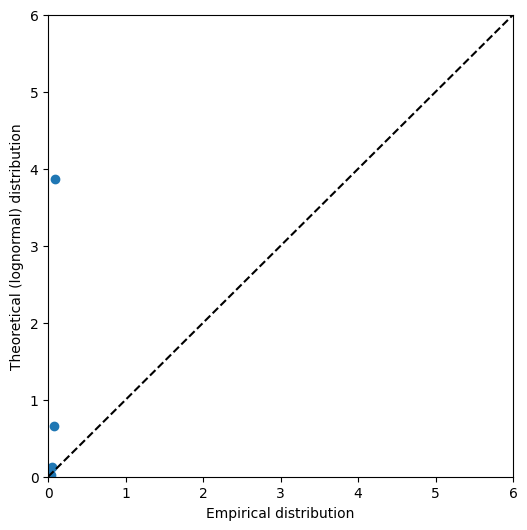

In [12]:
# Determination of the parameters of the lognormal distribution of the average transaction value for North America
x = np.linspace(np.min(res['North America']), np.max(res['North America']))

# The distribution parameters are determined using the fit function based on the maximum likelihood method
params = scipy.stats.lognorm.fit(res['North America'])
pdf = scipy.stats.lognorm.pdf(x, *params)

# Calculation of the Kolmogorov-Smirnov test and chi-square
# 0.05 - quantile of Kolmogorov distribution,
# if test pvalue > 0.05, distribution and real data are quite similar
ks = scipy.stats.kstest(res['North America'], 'lognorm', params, N=1000)
chi2 = scipy.stats.chisquare(res['North America'])
print("Kolmogorov-Smirnov test pvalue = {}".format(ks.pvalue))
print("Chi-square pvalue = {}".format(chi2.pvalue))

# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(res['North America'], percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)
# print(qn_first)
# print(qn_lognorm)

# Building a quantile biplot
plt.figure(figsize=(6, 6))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()